In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cs_training = pd.read_csv(r"E:\牛奕彤文件\PHBS课程\MODULE3\Machine Learning for Finance\cs-training.csv\cs-training.csv")
del cs_training['Unnamed: 0']

In [3]:
cs_training

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Preprocessing

In [4]:
cs_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
cs_training.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [6]:
cs_training[[i for i in cs_training.columns if i != 'SeriousDlqin2yrs']].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Fill in missing values

In [7]:
for i in range(cs_training.shape[1]):
    # count number of rows with missing values
    n_miss = cs_training.iloc[:,i].isnull().sum()
    perc = n_miss / cs_training.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 29731 (19.8%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 3924 (2.6%)


In [8]:
cs_training = cs_training.fillna(cs_training.mean())

## Standardization

In [9]:
X = cs_training.iloc[:, 1:].values
Y = cs_training.iloc[:, 0].values

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
sc.fit(X)
X_std = sc.transform(X)

In [11]:
X_std.shape

(150000, 10)

# Select the 2 most important features using LogisticRegression with L1 penalty

In [44]:
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=1, solver='liblinear', class_weight='balanced')
    lr.fit(X_std, Y)
    weights.append(lr.coef_[0])
    params.append(10.**c)

weights = np.array(weights)

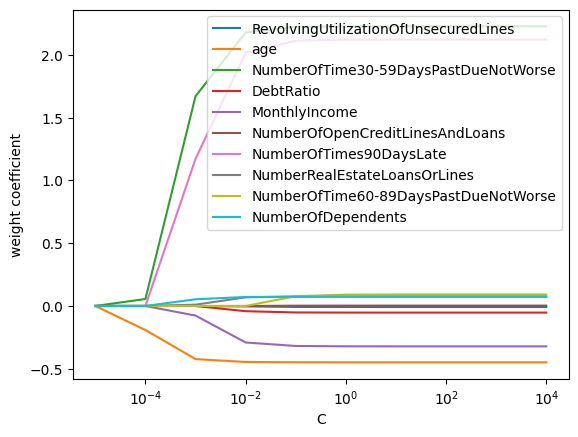

In [13]:
plt.plot(params, weights)
plt.xscale('log')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper right', labels=cs_training.columns[1:])

**The 2 most important features are 'NumberOfTime30-59DaysPastDueNotWorse' and 'age'.**

**The data of 'SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse' and 'age' are plotted below.**

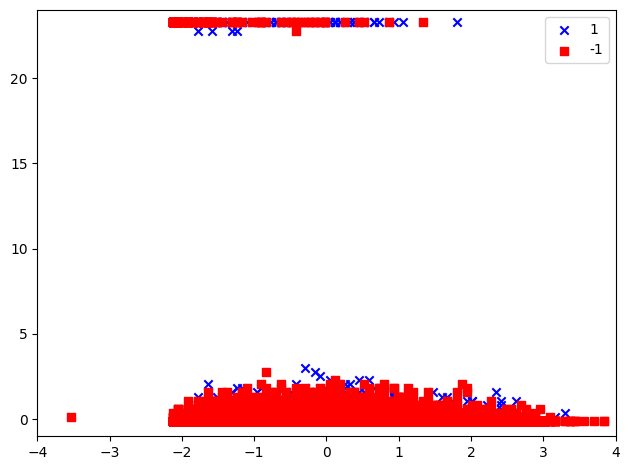

In [42]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_selected = X_std[:, [1, 2]]

plt.scatter(X_selected[Y == 1, 0],
            X_selected[Y == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_selected[Y == 0, 0],
            X_selected[Y == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-4, 4])
plt.ylim([-1, 24])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

# Apply Decision Tree to prediction

**I try different values for max_depth in 5-fold cross validation and find that prediction is most accurate when max_depth is set at 7.**

In [41]:
X_selected = X_std[:, [1, 2]]
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
    
for depth in range(2, 20):
    tree_model = DecisionTreeClassifier(criterion='entropy', 
                                        max_depth=depth, 
                                        random_state=1)
    
    kfold = StratifiedKFold(n_splits=5).split(X_selected, Y) # return five sets of indexes for train and test respectively

    scores = []
    for k, (train, test) in enumerate(kfold):
        X_train = X_selected[train]
        Y_train = Y[train]
        tree_model.fit(X_train, Y_train)
        scores.append(tree_model.score(X_selected[test], Y[test]))
        
    print(f'max_depth= %d : score= %.2f%%'%(depth, 100*sum(scores)/5))

max_depth= 2 : score= 93.32%
max_depth= 3 : score= 93.32%
max_depth= 4 : score= 93.30%
max_depth= 5 : score= 93.31%
max_depth= 6 : score= 93.34%
max_depth= 7 : score= 93.35%
max_depth= 8 : score= 93.32%
max_depth= 9 : score= 93.32%
max_depth= 10 : score= 93.31%
max_depth= 11 : score= 93.32%
max_depth= 12 : score= 93.30%
max_depth= 13 : score= 93.32%
max_depth= 14 : score= 93.31%
max_depth= 15 : score= 93.32%
max_depth= 16 : score= 93.31%
max_depth= 17 : score= 93.31%
max_depth= 18 : score= 93.32%
max_depth= 19 : score= 93.32%


# Visualize classifiers

C:\Users\NYT\AppData\Local\Temp\ipykernel_26268\1329802175.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


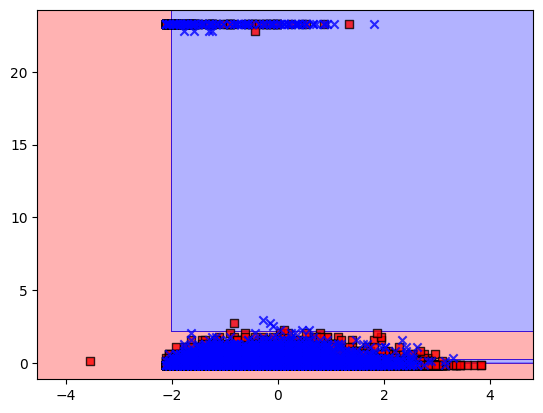

In [43]:
from matplotlib.colors import ListedColormap
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
tree_model.fit(X_selected, Y)

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')  

plot_decision_regions(X_selected, Y, tree_model)